In [4]:
#starter code given in lab 1
voltage = float(input("enter voltage (v):"))
resistance = float(input("enter resistance (R):"))
if resistance != 0:
    current = voltage/resistance
    print("current (A)", current)
else:
    print("error: resistance cannot be zero")

enter voltage (v):39
enter resistance (R):20
current (A) 1.95


###modify the code to allow multiple culculations in a loop.

In [5]:
while True:
    try:
        voltage = float(input("Enter voltage (V): "))
        if voltage == 0:
            break
        resistance = float(input("Enter resistance (R): "))

        if resistance != 0:
            current = voltage / resistance
            print("Current (A):", current)
        else:
            print("Error: Resistance cannot be zero.")
    except ValueError:
        print("Invalid input. Please enter numeric values.")

Enter voltage (V): 5
Enter resistance (R): 3
Current (A): 1.6666666666666667
Enter voltage (V): 4
Enter resistance (R): 5
Current (A): 0.8
Enter voltage (V): 6
Enter resistance (R): 6
Current (A): 1.0
Enter voltage (V): 0


###Add exception handling for invalid input

In [6]:
try:
    value = float(input("Enter a number: "))
    print(f"You entered: {value}")
except ValueError:
    print("Invalid input. Please enter a numeric value.")

Enter a number: 4
You entered: 4.0


###Extend the progam to culculate power:$P=V*I$

In [7]:
while True:
    try:
        voltage = float(input("Enter voltage (V): "))
        if voltage == 0:
            break
        resistance = float(input("Enter resistance (R): "))

        if resistance != 0:
            current = voltage / resistance
            power = voltage * current # Calculate power
            print("Current (A):", current)
            print("Power (W):", power) # Print power
        else:
            print("Error: Resistance cannot be zero.")
    except ValueError:
        print("Invalid input. Please enter numeric values.")

Enter voltage (V): 2
Enter resistance (R): 4
Current (A): 0.5
Power (W): 1.0
Enter voltage (V): 2
Enter resistance (R): 4
Current (A): 0.5
Power (W): 1.0
Enter voltage (V): 5
Enter resistance (R): 
Invalid input. Please enter numeric values.
Enter voltage (V): 5
Enter resistance (R): 5
Current (A): 1.0
Power (W): 5.0
Enter voltage (V): 0


***LAB 2:CIRCUIT SIMULATION***

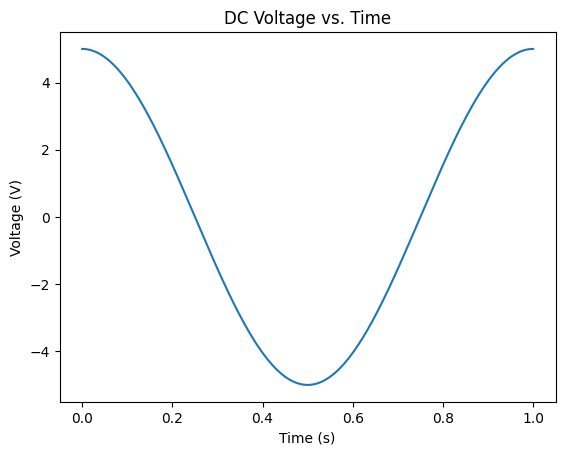

In [8]:
#Lab 2 starter code
import numpy as np
import matplotlib.pyplot as plt

R = 1000  #ohm's
C = 1e-6 #farads
V = 5    #volts

t = np.linspace(0, 1, 1000)
Vc = V * np.cos(2 * np.pi * 1000 * t)

plt.plot(t, Vc)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('DC Voltage vs. Time')
plt.show()



###How python can help visualize concepts under circuit theory

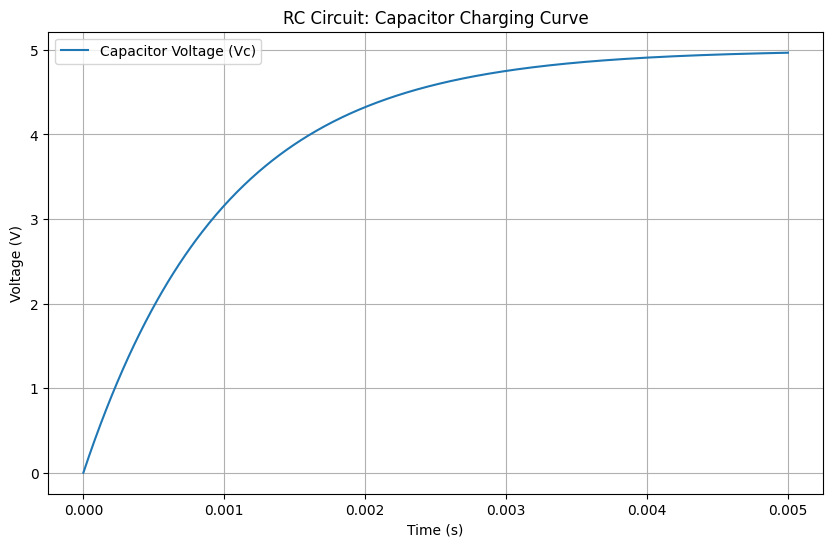

Time constant (tau) = R * C = 0.001 seconds
This plot shows how the capacitor charges over time towards the supply voltage.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# RC Circuit parameters
R = 1000  # Ohms
C = 1e-6  # Farads
V_supply = 5 # Volts

# Time vector
tau = R * C # Time constant
t = np.linspace(0, 5 * tau, 500) # Simulate for 5 time constants

# Calculate capacitor voltage during charging
Vc_charging = V_supply * (1 - np.exp(-t / tau))

# Plotting the capacitor charging curve
plt.figure(figsize=(10, 6))
plt.plot(t, Vc_charging, label='Capacitor Voltage (Vc)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RC Circuit: Capacitor Charging Curve')
plt.grid(True)
plt.legend()
plt.show()

print(f"Time constant (tau) = R * C = {tau:.3f} seconds")
print("This plot shows how the capacitor charges over time towards the supply voltage.")

***LAB 3:DATA LOGGING AND PLOTTING***

In [11]:
#starter code
import random, time
import matplotlib.pyplot as plt

temp = []
for i in range(10):
    temp = 25 + random.uniform(-1,1)
    temps.append(temp)
    with open("temps.csv", "a") as f:
        f.write(f"{t},"{temp}\n")
    time.sleep(0.5)

plt.plot(temps)
plt.xlebal("Time (s)")
plt.ylabel("Temperature (C)")
plt.title("Temperature log")
plt.grid(True)
plt.show()

SyntaxError: unexpected character after line continuation character (ipython-input-2499724887.py, line 10)

###modify the code to run both temperature and humidity

### Modify code to log both temperature and humidity
### Use different file formats ($CSS, TXT$)
### Add error handling for file operation

Reading data from 'temp_humidity_log.csv' for analysis...

First 5 rows of the data:


,Temperature,Humidity
0,24.80,53.54
1,25.63,51.61
2,25.92,46.34
3,25.41,51.28
4,25.96,48.45



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  10 non-null     float64
 1   Humidity     10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes

Descriptive statistics:


,Temperature,Humidity
count,10.000000,10.000000
mean,25.160000,49.990000
std,0.616982,2.212389
min,24.310000,46.340000
25%,24.590000,48.337500
50%,25.305000,50.540000
75%,25.585000,51.527500
max,25.960000,53.540000


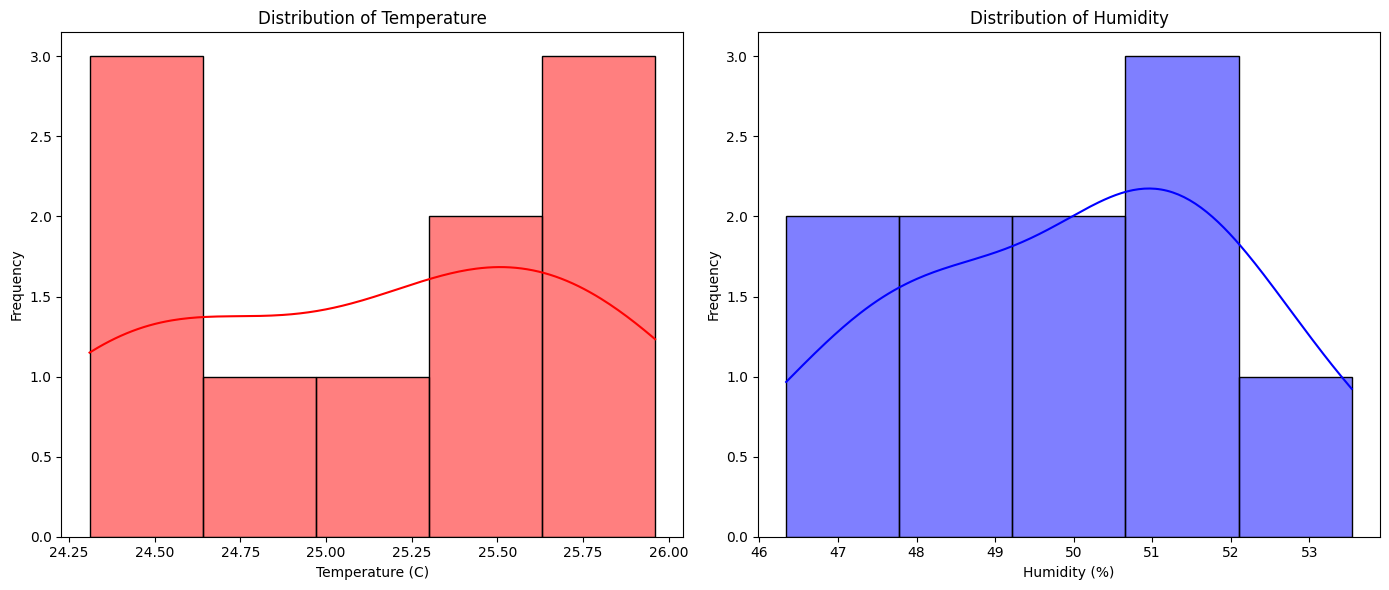

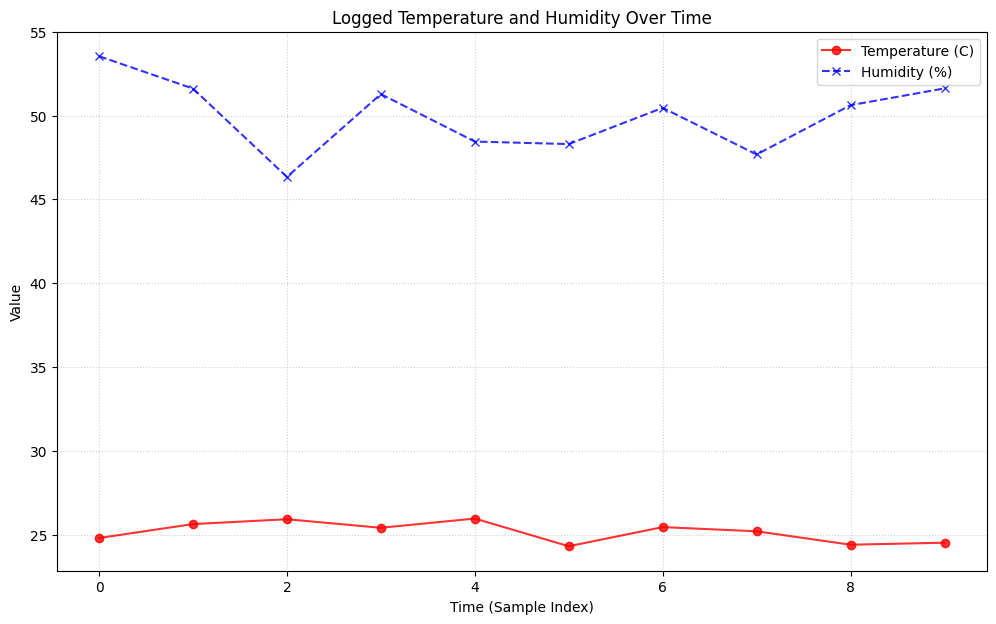

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the filename used for logging
filename = "temp_humidity_log.csv"

print(f"Reading data from '{filename}' for analysis...")

try:
    # Read the data into a pandas DataFrame
    df_analysis = pd.read_csv(filename)

    print("\nFirst 5 rows of the data:")
    display(df_analysis.head())

    print("\nData information:")
    df_analysis.info()

    print("\nDescriptive statistics:")
    display(df_analysis.describe())

    # Plotting distributions (histograms)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df_analysis['Temperature'], kde=True, color='red')
    plt.title('Distribution of Temperature')
    plt.xlabel('Temperature (C)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.histplot(df_analysis['Humidity'], kde=True, color='blue')
    plt.title('Distribution of Humidity')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Plotting time series again with slightly different styling
    plt.figure(figsize=(12, 7))
    plt.plot(df_analysis.index, df_analysis['Temperature'], marker='o', linestyle='-', color='r', label='Temperature (C)', alpha=0.8)
    plt.plot(df_analysis.index, df_analysis['Humidity'], marker='x', linestyle='--', color='b', label='Humidity (%)', alpha=0.8)
    plt.xlabel('Time (Sample Index)')
    plt.ylabel('Value')
    plt.title('Logged Temperature and Humidity Over Time')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found. Please ensure data has been logged.")
except Exception as e:
    print(f"An error occurred during analysis or plotting: {e}")